<a href="https://colab.research.google.com/github/TatyanaLanceva/Netology/blob/main/7_6_Central_Limit_Theorem_Demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Центральная предельная теорема и статистика".

## Задание.

В этом задании нужно убедиться, что ЦПТ действительно работает.

Создайте случайную величину из [любого выбранного вами распределения](https://docs.scipy.org/doc/scipy/reference/stats.html), для разных значений `n` сгенерируйте 1000 выборок размера `n`. Постройте гистрограммы средних этих выборок и сделайте выводы.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [ ]:
rv = sts.expon(loc=0, scale=1)  # Экспоненциальное распределение
sample = rv.rvs(size=1000) # 1000 выборок


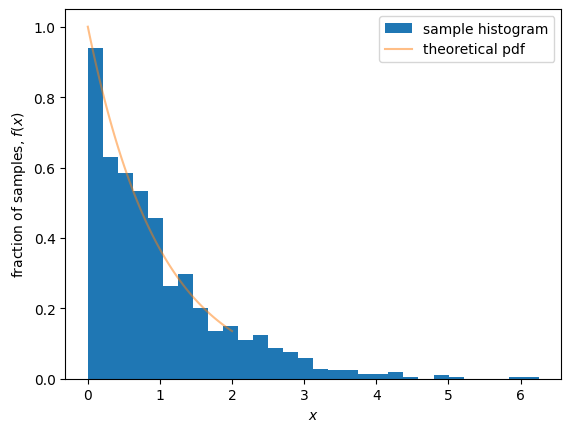

In [ ]:
x = np.linspace(0,2,100)
pdf = rv.pdf(x)
plt.hist(sample, density=True, bins=30, label='sample histogram')
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')
plt.show()

In [ ]:
n1 = 2
n2 = 10
n3 = 30               # Размеры выборок

a1 = np.array([])     # Массивы для сохранения средних по выборкам
a2 = np.array([])
a3 = np.array([])


samples_count = 1000  # Количество повторов генерации

for number in range(samples_count):
    sample1 = rv.rvs(size=n1)               # На каждом цикле генерируем выборки указанных размеров
    sample2 = rv.rvs(size=n2)
    sample3 = rv.rvs(size=n3)

    a1 = np.append(a1, sample1.mean())      # Считаем среднее по каждой выборке и добавляем в массив средних
    a2 = np.append(a2, sample2.mean())
    a3 = np.append(a3, sample3.mean())


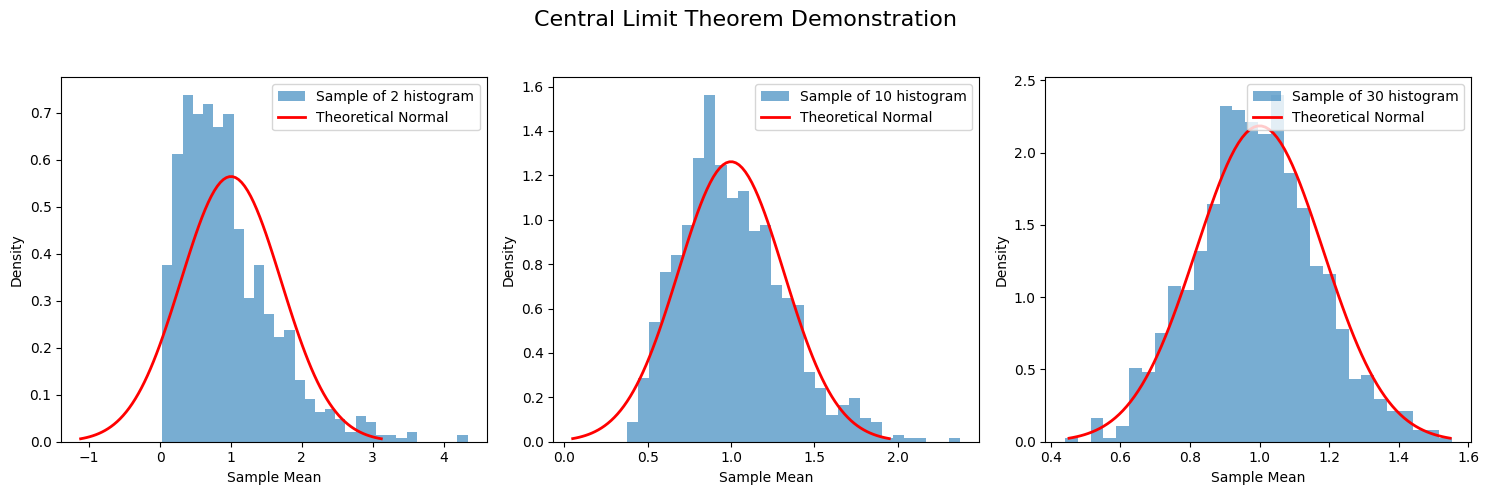

In [ ]:
# Определяем параметры для построения графиков
label_1 = 'Sample of ' + str(n1) + ' histogram'
label_2 = 'Sample of ' + str(n2) + ' histogram'
label_3 = 'Sample of ' + str(n3) + ' histogram'

# Параметры исходного распределения
mu = rv.mean()          # Математическое ожидание
sigma = rv.std()        # Стандартное отклонение

# Функция для построения гистограммы и нормальной аппроксимации
def plot_hist_with_normal(data, n, label):
    plt.hist(data, density=True, bins=30, alpha=0.6, label=label)

    # Теоретическое нормальное распределение
    x_pdf = np.linspace(mu - 3*sigma/np.sqrt(n), mu + 3*sigma/np.sqrt(n), 100)
    y_pdf = sts.norm.pdf(x_pdf, loc=mu, scale=sigma/np.sqrt(n))

    plt.plot(x_pdf, y_pdf, 'r-', lw=2, label='Theoretical Normal')
    plt.legend()
    plt.ylabel('Density')
    plt.xlabel('Sample Mean')

# Построение графиков
plt.figure(figsize=(15, 5))

# График для n1 = 2
plt.subplot(1, 3, 1)
plot_hist_with_normal(a1, n1, label_1)

# График для n2 = 10
plt.subplot(1, 3, 2)
plot_hist_with_normal(a2, n2, label_2)

# График для n3 = 30
plt.subplot(1, 3, 3)
plot_hist_with_normal(a3, n3, label_3)

plt.suptitle('Central Limit Theorem Demonstration', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Регулируем расположение графиков
plt.show()